In [1]:
import cv2 as cv
import numpy as np 
from matplotlib import pyplot as plt
import imutils

In [2]:
input_img = cv.imread("maze09.jpg",1)

In [3]:
def applyPerspectiveTransform(input_img):

	"""
	Purpose:
	---
	takes a maze test case image as input and applies a Perspective Transfrom on it to isolate the maze

	Input Arguments:
	---
	`input_img` :   [ numpy array ]
		maze image in the form of a numpy array
	
	Returns:
	---
	`warped_img` :  [ numpy array ]
		resultant warped maze image after applying Perspective Transform
	
	Example call:
	---
	warped_img = applyPerspectiveTransform(input_img)
	"""

	warped_img = None

	##############	ADD YOUR CODE HERE	##############
	gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
	gray = cv.GaussianBlur(gray, (3,3), 2)
	edged = cv.Canny(gray, 50, 200)
	cnts = cv.findContours(edged.copy(), cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)	
	if len(cnts) == 2:
		cnts = cnts[0]
	elif len(cnts) == 3:
		cnts = cnts[1]
	cnts = sorted(cnts, key = cv.contourArea, reverse = True)
	for c in cnts:
		peri = cv.arcLength(c, True)
		approx = cv.approxPolyDP(c, 0.02 * peri, True)
		print(len(approx))

		if len(approx) == 4:
			screenCnt = approx
			break
	pts = screenCnt.reshape(4, 2)
	
	rect = np.zeros((4, 2), dtype = "float32")

	s = pts.sum(axis = 1)
	rect[0] = pts[np.argmin(s)]
	rect[2] = pts[np.argmax(s)]

	diff = np.diff(pts, axis = 1)
	rect[1] = pts[np.argmin(diff)]
	rect[3] = pts[np.argmax(diff)]
	(tl, tr, br, bl) = rect

	widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
	widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
	maxWidth = max(int(widthA), int(widthB))

	heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
	heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
	maxHeight = max(int(heightA), int(heightB))
	#print(f"max width{maxWidth} and max height = {maxHeight}")

	dst = np.array([[0, 0],[maxWidth - 1, 0],[maxWidth - 1, maxHeight - 1],[0, maxHeight - 1]], dtype = "float32")
	M = cv.getPerspectiveTransform(rect, dst)
	warped_img = cv.warpPerspective(input_img, M, (maxWidth, maxHeight))
	

	##################################################

	return warped_img

In [4]:
warped_img = applyPerspectiveTransform(input_img)

4


In [5]:
def detectMaze(warped_img):

	"""
	Purpose:
	---
	takes the warped maze image as input and returns the maze encoded in form of a 2D array

	Input Arguments:
	---
	`warped_img` :    [ numpy array ]
		resultant warped maze image after applying Perspective Transform
	
	Returns:
	---
	`maze_array` :    [ nested list of lists ]
		encoded maze in the form of a 2D array

	Example call:
	---
	maze_array = detectMaze(warped_img)
	"""

	maze_array = []

	##############	ADD YOUR CODE HERE	##############
	warped_img_gray = cv.cvtColor(warped_img, cv.COLOR_BGR2GRAY)
	warped_img_gray = cv.GaussianBlur(warped_img_gray,(3,3),0)
	ret,thresh = cv.threshold(warped_img_gray,70,255,cv.THRESH_BINARY)
	thresh = cv.copyMakeBorder(thresh,5,5,5,5, cv.BORDER_CONSTANT,value=[0,0,0]) 
	resized_image = cv.resize(thresh, (400, 400)) 
	jincrement = resized_image.shape[0]//10
	iincrement = resized_image.shape[1]//10
	

	for i in range(0,resized_image.shape[1],iincrement):
		maze_array.append([])
		for j in range(0,resized_image.shape[0],jincrement):


			
				img_temp = resized_image[i:i+44,j:j+44]







				



				img_temp = cv.rectangle(img_temp,(0,0),(10,10),[255,255,255],-1)
				img_temp = cv.rectangle(img_temp,(35,0),(44,10),[255,255,255],-1)

				img_temp = cv.rectangle(img_temp,(0,35),(10,45),[255,255,255],-1)

				img_temp = cv.rectangle(img_temp,(35,35),(44,44),[255,255,255],-1)



				north = 0
				west = 0
				east = 0
				south = 0
				
				if(img_temp[0,20] or img_temp[5,20] or img_temp[10,20]):

						north = 2
					



				
				if(img_temp[20,0] or img_temp[20,10] or img_temp[20,15] or img_temp[15,0]):
						west = 1
						



				
				if(img_temp[30,20] or img_temp[35,20] or img_temp[43,20] ):

						south = 8
						



			
				if(img_temp[20,30] or img_temp[20,35] or img_temp[20,43] ):


						east = 4
						
				print(east,north,west,south)
				plt.imshow(img_temp,cmap= 'gray')
				plt.show()

				maze_array[i//40].append(north + south + east + west)
				









	
	
	
	##################################################

	return maze_array

4 2 1 8


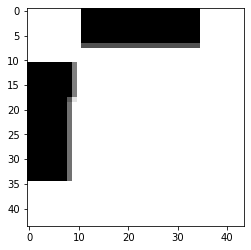

4 2 1 8


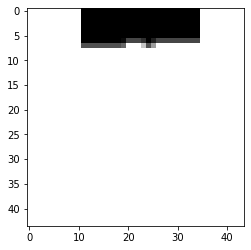

4 2 1 8


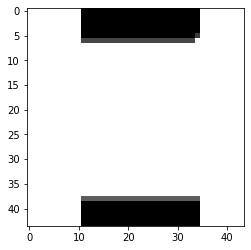

4 2 1 8


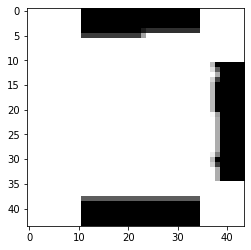

4 2 1 8


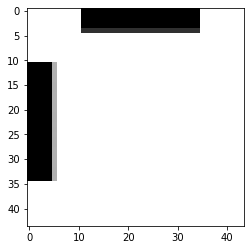

4 2 1 8


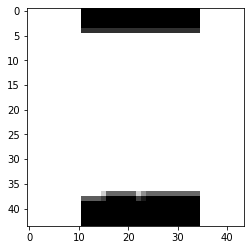

4 2 1 8


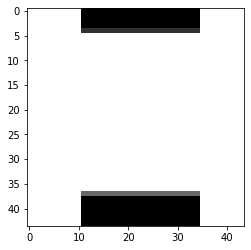

4 2 1 8


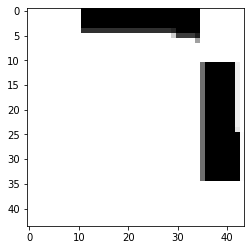

4 2 1 8


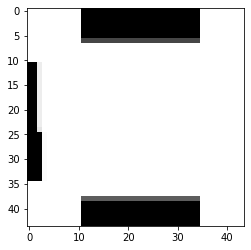

4 2 1 8


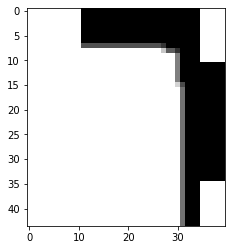

4 2 1 8


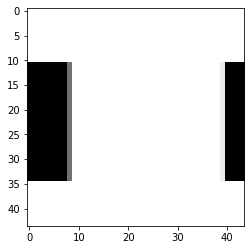

4 2 1 8


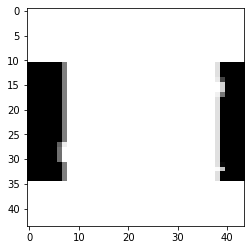

4 2 1 8


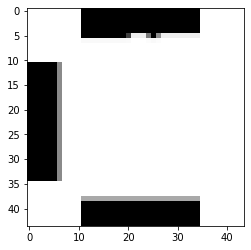

4 2 1 8


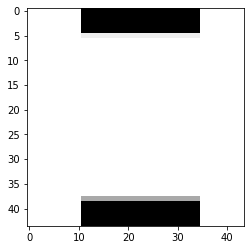

4 2 1 8


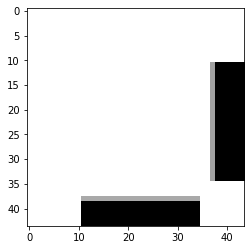

4 2 1 8


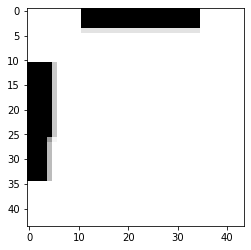

4 2 1 8


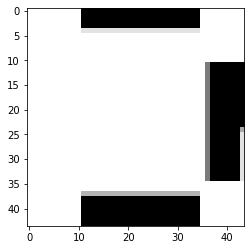

4 2 1 8


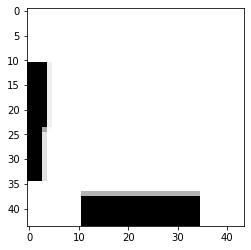

4 2 1 8


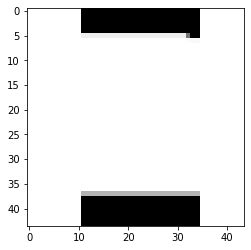

4 2 1 8


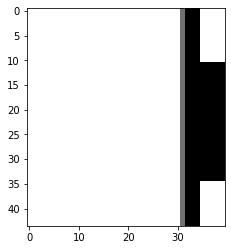

4 2 1 8


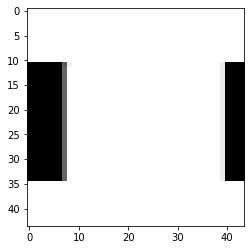

4 2 1 8


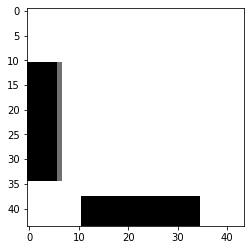

4 2 1 8


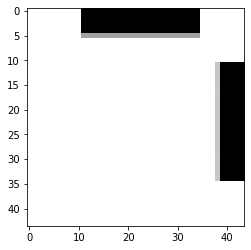

4 2 1 8


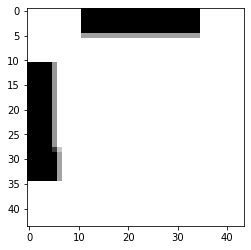

4 2 1 8


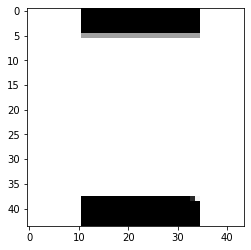

4 2 1 8


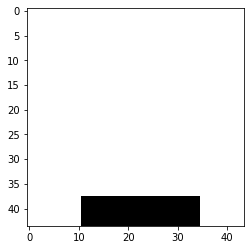

4 2 1 8


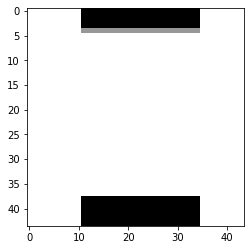

4 2 1 8


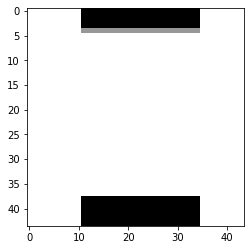

4 2 1 8


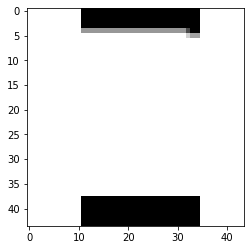

4 2 1 8


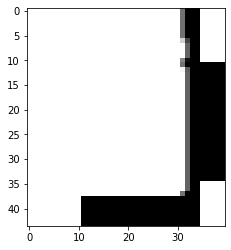

4 2 1 8


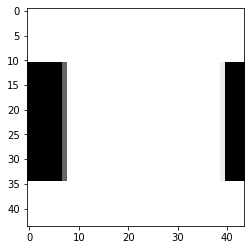

4 2 1 8


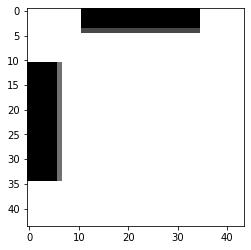

4 2 1 8


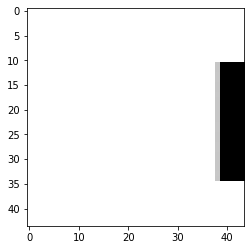

4 2 1 8


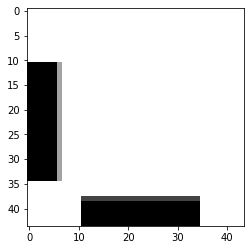

4 2 1 8


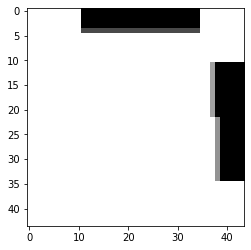

4 2 1 8


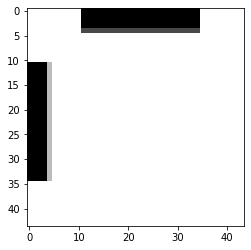

4 2 1 8


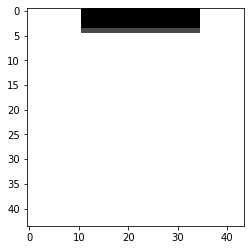

4 2 1 8


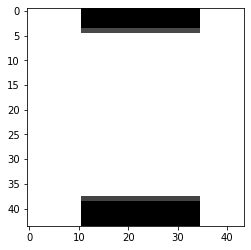

4 2 1 8


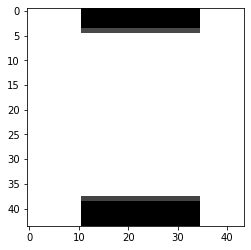

4 2 1 8


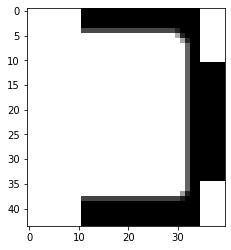

4 2 1 8


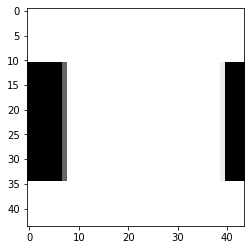

4 2 1 8


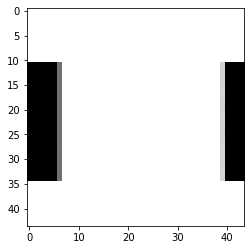

4 2 1 8


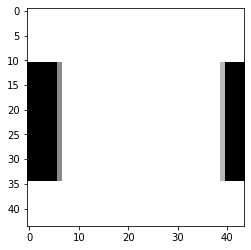

4 2 1 8


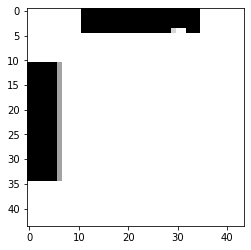

4 2 1 8


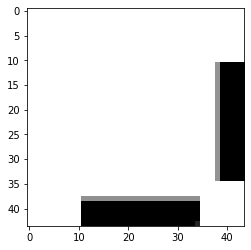

4 2 1 8


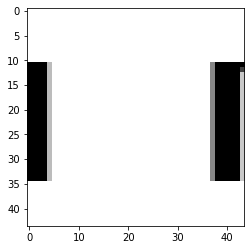

4 2 1 8


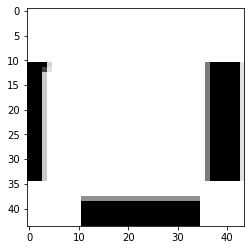

4 2 1 8


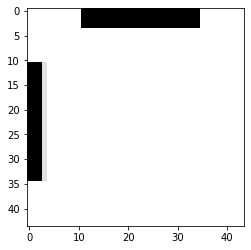

4 2 1 8


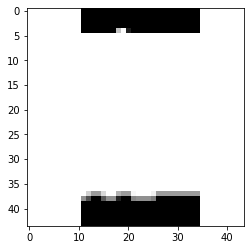

4 2 1 8


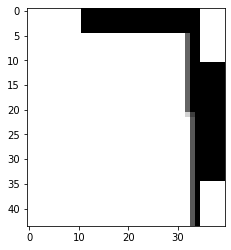

4 2 1 8


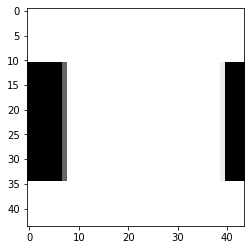

4 2 1 8


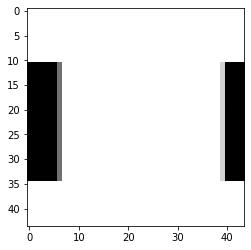

4 2 1 8


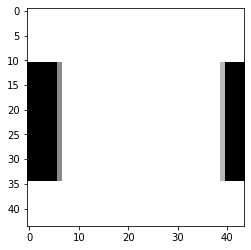

4 2 1 8


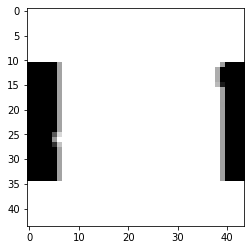

4 2 1 8


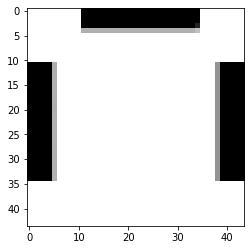

4 2 1 8


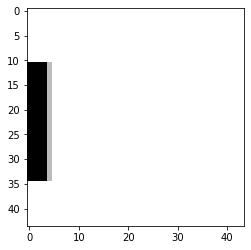

4 2 1 8


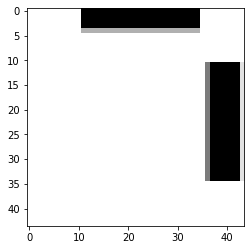

4 2 1 8


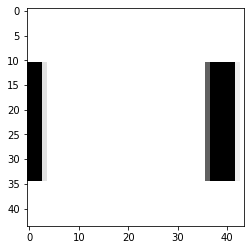

4 2 1 8


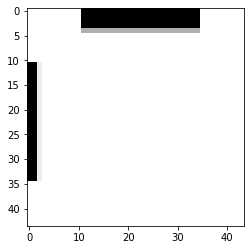

4 2 1 8


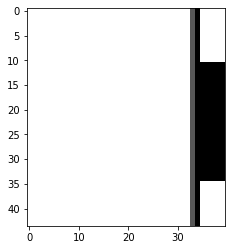

4 2 1 8


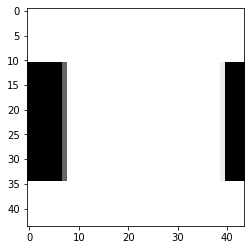

4 2 1 8


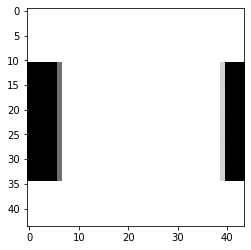

4 2 1 8


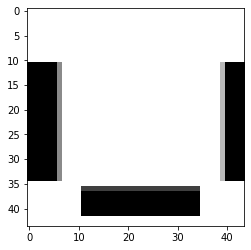

4 2 1 8


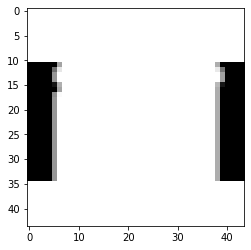

4 2 1 8


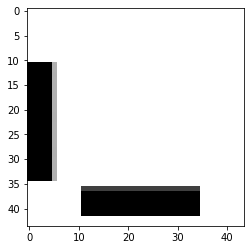

4 2 1 8


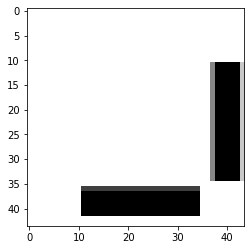

4 2 1 8


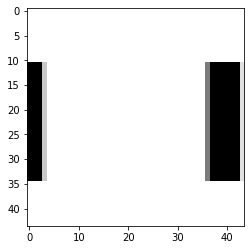

4 2 1 8


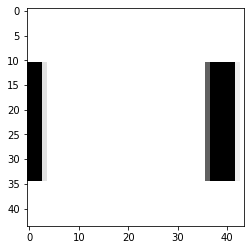

4 2 1 8


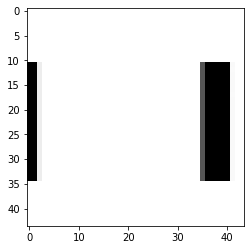

4 2 1 8


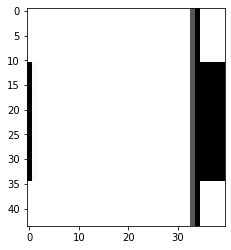

4 2 1 8


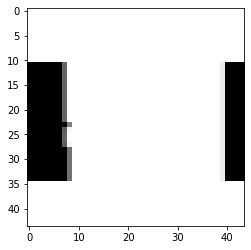

4 2 1 8


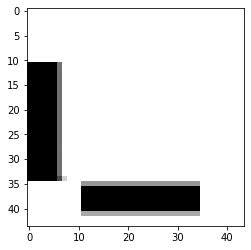

4 2 1 8


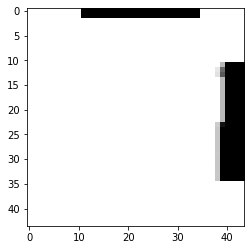

4 2 1 8


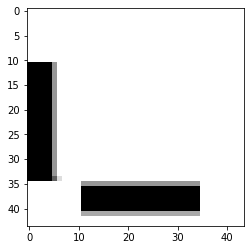

4 2 1 8


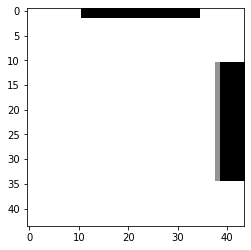

4 2 1 8


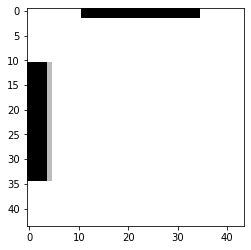

4 2 1 8


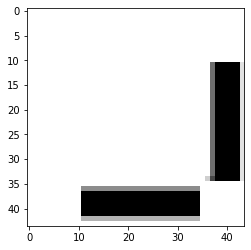

4 2 1 8


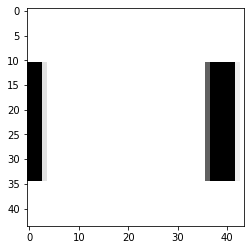

4 2 1 8


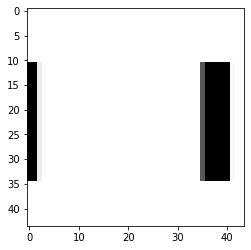

4 2 1 8


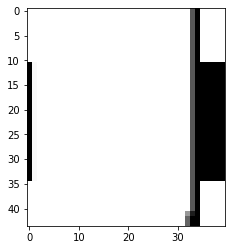

4 2 1 8


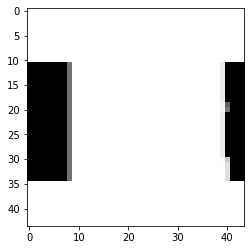

4 2 1 8


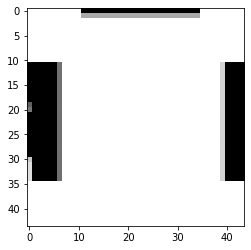

4 2 1 8


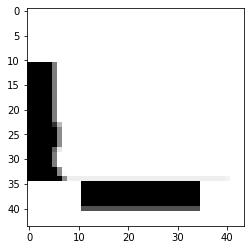

4 2 1 8


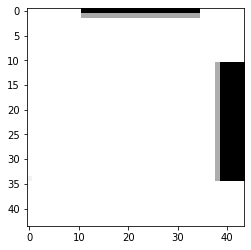

4 2 1 8


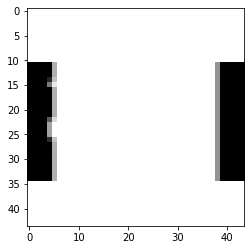

4 2 1 8


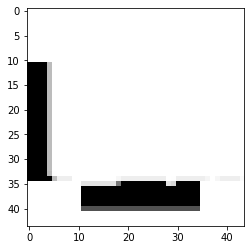

4 2 1 8


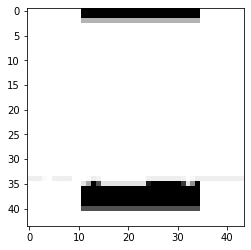

4 2 1 8


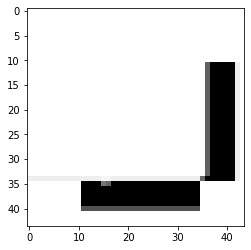

4 2 1 8


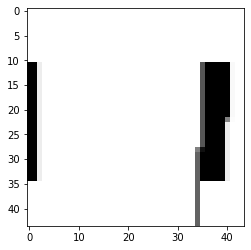

4 2 1 8


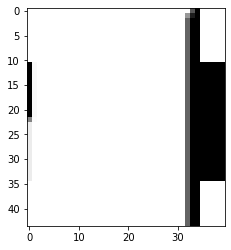

4 2 1 8


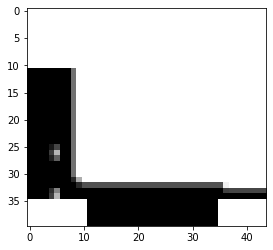

4 2 1 8


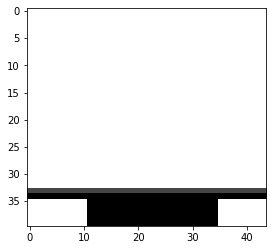

4 2 1 8


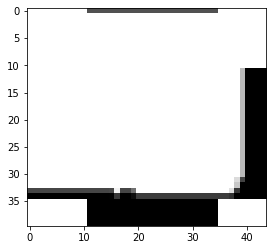

4 2 1 8


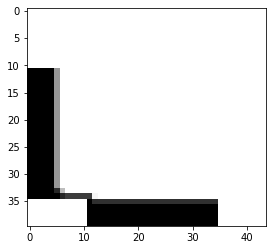

4 2 1 8


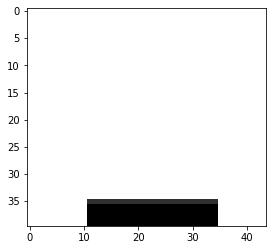

4 2 1 8


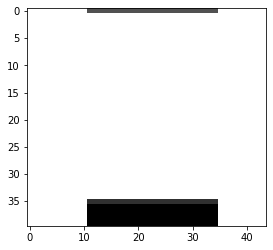

4 2 1 8


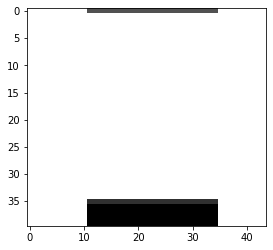

4 2 1 8


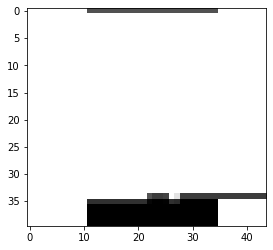

4 2 1 8


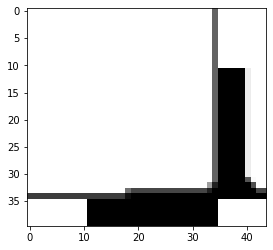

4 2 1 8


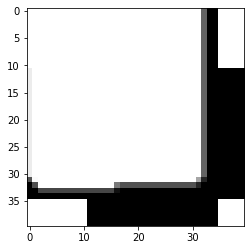

In [6]:
maze_array = detectMaze(warped_img)

In [7]:
print(maze_array)

[[15, 15, 15, 15, 15, 15, 15, 15, 15, 15], [15, 15, 15, 15, 15, 15, 15, 15, 15, 15], [15, 15, 15, 15, 15, 15, 15, 15, 15, 15], [15, 15, 15, 15, 15, 15, 15, 15, 15, 15], [15, 15, 15, 15, 15, 15, 15, 15, 15, 15], [15, 15, 15, 15, 15, 15, 15, 15, 15, 15], [15, 15, 15, 15, 15, 15, 15, 15, 15, 15], [15, 15, 15, 15, 15, 15, 15, 15, 15, 15], [15, 15, 15, 15, 15, 15, 15, 15, 15, 15], [15, 15, 15, 15, 15, 15, 15, 15, 15, 15]]
